# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene


## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

url_calls = 'https://raw.githubusercontent.com/Ramon-Bravo/datasets_publicos/refs/heads/main/megaline_calls.csv'
url_internet = 'https://raw.githubusercontent.com/Ramon-Bravo/datasets_publicos/refs/heads/main/megaline_internet.csv'
url_sms = 'https://raw.githubusercontent.com/Ramon-Bravo/datasets_publicos/refs/heads/main/megaline_messages.csv'
url_plans = 'https://raw.githubusercontent.com/Ramon-Bravo/datasets_publicos/refs/heads/main/megaline_plans.csv'
url_users = 'https://raw.githubusercontent.com/Ramon-Bravo/datasets_publicos/refs/heads/main/megaline_users.csv'

df_calls = pd.read_csv(url_calls)
df_internet = pd.read_csv(url_internet)
df_sms = pd.read_csv(url_sms)
df_plans = pd.read_csv(url_plans)
df_users = pd.read_csv(url_users)

## Preparar los datos

**Para esta parte del proyecto apliqué el método info para todos los DataFrames que creé en el paso anterior, observando que no contamos con columnas con datos ausentes, con la única excepción en el DF de usuarios en la columna de cancelación, sin embargo, que existan datos vacíos es normal ya que se trata de la fecha de cancelación. También, con la finalidad de comprobar que no hubiese filas duplicadas, de lo anterior se observa que no contamos con datos duplicados.**

In [3]:
print(df_users.info())
print(df_users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
0


## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.info())
print('\n')
print(df_plans.describe())
print('\n')
print('Verificacion de filas duplicadas en el DF de las tarifas: ', df_plans.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000      

In [5]:
# Imprime una muestra de los datos para las tarifas

df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

## Enriquecer los datos

**Debido a que en el df que almacena los datos del Internet usado por los usuarios al mes se encuentra en megabytes, y el df de las tarifas cuenta con la columna "usd_per_gb", considero importante agregar una columna que contenga el precio por mb extra para los usuarios llamada "usd_per_mb" la cual considerará la conversión 1 GB = 1000 MB**

In [6]:
df_plans['usd_per_mb'] = df_plans['usd_per_gb'] / 1024

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb
0,50,15360,500,20,10,0.03,0.03,surf,0.009766
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(df_users.info())
print('\n')
print(df_users.describe())

print('Verificacion de filas duplicadas en el DF de los usuarios: ', df_users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000
Verificacion de filas duplicadas en el DF de los usuarios:  0


In [8]:
# Imprime una muestra de datos para usuarios

df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Se observa que para la columna reg_date y churn_date tienen como tipo de datos object, además de que la segunda columna objetivo existen valores nulos. Se deben cambiar ambos al tipo date. De igual forma no se observan filas duplicadas para el df.**

### Corregir los datos

**Inicialmente realizaré el cambio de los tipos de datos para las columnas reg_date y churn_date de object a date.**

In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

### Enriquecer los datos

**Observando la columna del df_users me percato que la columna city todas las filas terminan con el texto MSA (Metropolitan Statistical Area), estas siglas son usadas por una dependencia gubernamental de EEUU, por ejemplo, si vemos GA MSA, esto se riefiere al Área Metropolitana de Georgia y sus alrededores, dicha área geográfica cuenta con una población mínima de 50 mil personas, por lo anterior creo que no es información que sirva al propósito del proyecto así que eliminaré esa parte del texto.**

**Adicionalmente, detecté que la misma columna cuenta con el estado y la ciudad combinada, debido a esto, decidí separar dichos datos en columnas independientes. Es importante mencionar que las áreas metropolitanas que son muy grandes y se situan en mas de un estado son identificadas con los nombres de los estados que comprenden y separadas con un guión.**

In [10]:
# Eliminacion string MSA de la columna city

df_users['city'] = df_users['city'].str.replace('MSA', '', regex=False)
df_users[['city', 'state']] = df_users['city'].str.split(', ', expand=True)

In [11]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(df_calls.info())
print('\n')
print(df_calls.describe())
print('\n')
print('Verificacion de filas duplicadas en el DF de las llamadas: ', df_calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


Verificacion de filas duplicadas en el DF de las llamadas:  0


In [13]:
# Imprime una muestra de datos para las llamadas

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**En el df llamadas se observa que cuenta con 4 columnas, una de las cuales (call_date) considero sea necesario cambiar el tipo de datos a date. Por otro lado, se observa que no existen filas duplicadas.También se observa que el df contiene la columna id, la cual esta compuesta por el id del usuario que realizó la llamada seguido por un guión bajo y un numero que supongo es un numero consecutivo para la llamada, la cual la identifica de manera única.**

### Corregir los datos

**Se realiza el cambio de tipo de dato en la columna call_date al tipo de dato adecuado.**

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

**El enriquecimiento de los datos para este dataframe lo realizaré agregando una columna llamada month, la cual considera el mes en el que el usuario realizó la llamada.**

In [15]:
df_calls['month'] = df_calls['call_date'].dt.month_name().tolist()

df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,December
1,1000_145,1000,2018-12-27,13.66,December
2,1000_247,1000,2018-12-27,14.48,December
3,1000_309,1000,2018-12-28,5.76,December
4,1000_380,1000,2018-12-30,4.22,December


**Debido a que en la descripción del proyecto se indica que no importa si la duración de la llamada fue de 1 segundo, esta será redondeada a 1 minuto, por lo anterior, agregué una columna que considera esta caracteristica para el dataframe de las llamadas.**

In [16]:
df_calls['duration_cieled'] = np.ceil(df_calls.duration)

df_calls.head()

,id,user_id,call_date,duration,month,duration_cieled
0,1000_93,1000,2018-12-27,8.52,December,9.0
1,1000_145,1000,2018-12-27,13.66,December,14.0
2,1000_247,1000,2018-12-27,14.48,December,15.0
3,1000_309,1000,2018-12-28,5.76,December,6.0
4,1000_380,1000,2018-12-30,4.22,December,5.0


## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(df_sms.info())
print('\n')
print(df_sms.describe())
print('\n')
print('Verificacion de filas duplicadas en el DF de los mensajes: ', df_sms.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


Verificacion de filas duplicadas en el DF de los mensajes:  0


In [18]:
# Imprime una muestra de datos para los mensajes

df_sms.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Para el df de mensajes se observa que la columna que indica la fecha se encuentra en un tipo de dato, por lo que es oportuno cambiarlo al tipo de dato correcto. También se observa que el df contiene la columna id, la cual esta compuesta por el id del usuario que mandó el mensaje de texto seguido por un guión bajo y un numero que supongo es un numero consecutivo para el mensaje que lo identifica de manera única. No se observan valores duplicados para este df**

### Corregir los datos

In [19]:
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

**De igual forma que el df anterior, agregaré una columna que indique el mes en el que el usuario envió el mensaje de texto.**

In [20]:
df_sms['month'] = df_sms['message_date'].dt.month_name().tolist()

df_sms.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(df_internet.info())
print('\n\n')
print(df_internet.describe())

print('Verificacion de filas duplicadas en el DF de los mensajes: ', df_internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None



             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000
Verificacion de filas duplicadas en el DF de los mensajes:  0


In [22]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Con relación al dataframe de internet, la columna "session_date" debe ser cambiada al tipo de dato datetime. De igual forma que en los dfs de llamadas y mensajes se observa una columna llamada id, la cual está compuesta por el id del usuario, un guión bajo y un numero consecutivo que identifica de forma única la sesión de navegación del usuario. No se observan datos duplicados.**

### Corregir los datos

In [23]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

**En el caso de este df, también agregaré una columna que considere el mes en de la sesión del usuario de internet.**

In [24]:
df_internet['month'] = df_internet['session_date'].dt.month_name().tolist()

df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


## Estudiar las condiciones de las tarifas

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb
0,50,15360,500,20,10,0.03,0.03,surf,0.009766
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836


## Agregar datos por usuario

**Realizando la tarea de esta parte del proyecto, me percate que existe una gran cantidad de ids de llamadas y sesiones de navegación las cuales tienen como duración/consumo de mb 0.0, esto me parece que es incorrecto y es posible que aumente el numero de llamadas por usuario y afecte los análisis estadísticos posteriores, por lo anterior decidí remover dichos registros para todos los usuarios. Soy conciente que esta acción la debí realizar en el paso anterior para cada df; sin embargo lo realizaré en celdas que agregaré a continuación para mantener el prden del proyecto.**

In [26]:
# Eliminando llamadas y sesiones con 0.0

df_calls = df_calls[df_calls['duration'] != 0]
df_internet = df_internet[df_internet['mb_used'] != 0]

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

tot_calls_user = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index()


tot_calls_user.head()

,user_id,month,id
0,1000,December,16
1,1001,August,22
2,1001,December,46
3,1001,November,49
4,1001,October,47


In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

tot_mins_user = df_calls.groupby(['user_id', 'month'])['duration_cieled'].sum().reset_index()

tot_mins_user.head()

,user_id,month,duration_cieled
0,1000,December,124.0
1,1001,August,182.0
2,1001,December,412.0
3,1001,November,426.0
4,1001,October,393.0


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

tot_sms_user = df_sms.groupby(['user_id', 'month'])['id'].count().reset_index()

tot_sms_user.head()

,user_id,month,id
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

tot_internet_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

tot_internet_user.head()

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49


In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

calls_mins_merged = pd.merge(tot_calls_user, tot_mins_user, on=['user_id', 'month'], how='outer')
calls_sms_merged = pd.merge(calls_mins_merged, tot_sms_user, on=['user_id', 'month'], how='outer', suffixes=['_tot_calls', '_tot_sms'])
data_merged = pd.merge(calls_sms_merged, tot_internet_user, on=['user_id', 'month'], how='outer')

data_merged['mb_used_cieled'] = np.ceil(data_merged.mb_used)

data_merged.head()


,user_id,month,id_tot_calls,duration_cieled,id_tot_sms,mb_used,mb_used_cieled
0,1000,December,16.0,124.0,11.0,1901.47,1902.0
1,1001,August,22.0,182.0,30.0,6919.15,6920.0
2,1001,December,46.0,412.0,44.0,19369.18,19370.0
3,1001,November,49.0,426.0,36.0,18504.30,18505.0
4,1001,October,47.0,393.0,53.0,22330.49,22331.0


In [32]:
# Añade la información de la tarifa
df_users_i = df_users[['user_id', 'plan']]
data_w_plan = pd.merge(data_merged, df_users_i, on='user_id', how='left')
data_w_plan_i = pd.merge(data_w_plan, df_plans, left_on='plan', right_on='plan_name')

data_w_plan_i.head()

,user_id,month,id_tot_calls,duration_cieled,id_tot_sms,mb_used,mb_used_cieled,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb
0,1000,December,16.0,124.0,11.0,1901.47,1902.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836
1,1001,August,22.0,182.0,30.0,6919.15,6920.0,surf,50,15360,500,20,10,0.03,0.03,surf,0.009766
2,1001,December,46.0,412.0,44.0,19369.18,19370.0,surf,50,15360,500,20,10,0.03,0.03,surf,0.009766
3,1001,November,49.0,426.0,36.0,18504.30,18505.0,surf,50,15360,500,20,10,0.03,0.03,surf,0.009766
4,1001,October,47.0,393.0,53.0,22330.49,22331.0,surf,50,15360,500,20,10,0.03,0.03,surf,0.009766


In [33]:
data_w_plan_i.fillna(0, inplace=True)

**Para realizar esta tarea, añadiré columnas extras para calcular los costos extras en caso de que el usuario haya excedido el límite de los minutos de llamadas, mensajes de texto y mb de internet incluidos en el plan mensual, posteriormente, con una función lambda aplicada a cada columna extra realizaré el calculo de los cargos extras. Finalmente, colocaré una columna que considerará el costo total del plan mensual mas los cargos extras si es que aplican.**

In [34]:
# Calcula el ingreso mensual para cada usuario

data_w_plan_i['extra_mins_pay'] = data_w_plan_i.duration_cieled - data_w_plan_i.minutes_included
data_w_plan_i['extra_mins_pay'] = data_w_plan_i['extra_mins_pay'].apply(lambda x: max(x, 0))

data_w_plan_i['extra_sms_pay'] = data_w_plan_i.id_tot_sms - data_w_plan_i.messages_included
data_w_plan_i['extra_sms_pay'] = data_w_plan_i['extra_sms_pay'].apply(lambda x: max(x, 0))

data_w_plan_i['extra_internet_pay'] = data_w_plan_i.mb_used_cieled - data_w_plan_i.mb_per_month_included
data_w_plan_i['extra_internet_pay'] = data_w_plan_i['extra_mins_pay'].apply(lambda x: max(x, 0))

data_w_plan_i['extra_mins_pay'] = data_w_plan_i['extra_mins_pay'] * data_w_plan_i['usd_per_minute']
data_w_plan_i['extra_sms_pay'] = data_w_plan_i['extra_sms_pay'] * data_w_plan_i['usd_per_message']
data_w_plan_i['extra_internet_pay'] = data_w_plan_i['extra_internet_pay'] * data_w_plan_i['usd_per_mb']

data_w_plan_i['total_plan_cost'] = data_w_plan_i['extra_mins_pay'] + data_w_plan_i['extra_sms_pay'] + data_w_plan_i['extra_internet_pay'] + data_w_plan_i['usd_monthly_pay']

data_w_plan_i.head()


,user_id,month,id_tot_calls,duration_cieled,id_tot_sms,mb_used,mb_used_cieled,plan,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb,extra_mins_pay,extra_sms_pay,extra_internet_pay,total_plan_cost
0,1000,December,16.0,124.0,11.0,1901.47,1902.0,ultimate,1000,30720,...,70,7,0.01,0.01,ultimate,0.006836,0.0,0.00,0.0,70.00
1,1001,August,22.0,182.0,30.0,6919.15,6920.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.009766,0.0,0.00,0.0,20.00
2,1001,December,46.0,412.0,44.0,19369.18,19370.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.009766,0.0,0.00,0.0,20.00
3,1001,November,49.0,426.0,36.0,18504.30,18505.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.009766,0.0,0.00,0.0,20.00
4,1001,October,47.0,393.0,53.0,22330.49,22331.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.009766,0.0,0.09,0.0,20.09


## Estudia el comportamiento de usuario

### Llamadas

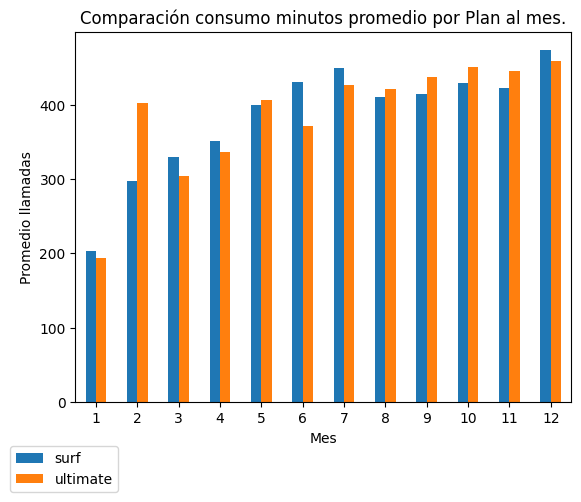

<Figure size 640x480 with 0 Axes>

In [35]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

plan_month_mins = data_w_plan_i.pivot_table(
    index='month',
    columns='plan',
    values='duration_cieled',
    aggfunc='mean'
)

plan_month_mins.reset_index(inplace=True)

month_ordered = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
plan_month_mins['month_ordered'] = plan_month_mins['month'].map(month_ordered)
plan_month_mins_sort = plan_month_mins.sort_values('month_ordered')


plan_month_mins_sort.plot(
    kind='bar',
    title='Comparación consumo minutos promedio por Plan al mes.',
    x='month_ordered',
    y=['surf', 'ultimate'],
    xlabel='Mes',
    ylabel='Promedio llamadas'
)

plt.legend(['surf', 'ultimate'])
plt.legend(loc='upper right', bbox_to_anchor=(0.1, -0.1))
plt.xticks(rotation = 0)
plt.show()
plt.clf()



In [36]:
data_w_plan_i.drop('plan_name', axis=1, inplace=True)

**Para este ejercicio decidí agregar una columna en un nuevo dataframe la cual consedere la diferencia de los minutos incluidos por plan, y los minutos utilizados por los usuarios. Posteriormente realizaré el histograma correspondiente con el fin de comparar el consumo de minutos en relación a lo que ofrece cada plan. Con esta gráfica pretendo visualizar la distribución de estas diferencias.**

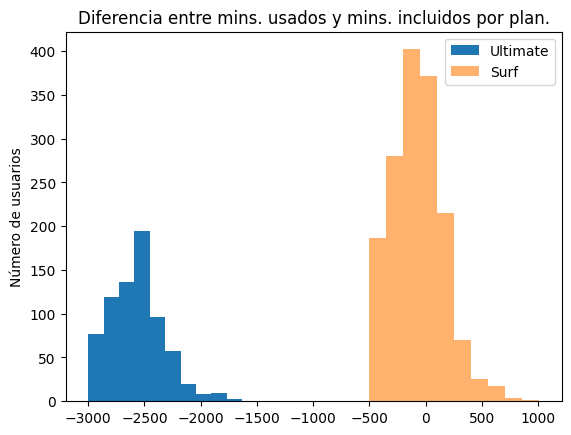

<Figure size 640x480 with 0 Axes>

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
ult_plan_mins = data_w_plan_i[['user_id','month', 'duration_cieled', 'plan', 'minutes_included']].query('plan == "ultimate"')
ult_plan_mins['dif_mins_used'] = ult_plan_mins.duration_cieled - ult_plan_mins.minutes_included

surf_plan_mins = data_w_plan_i[['user_id','month', 'duration_cieled', 'plan', 'minutes_included']].query('plan == "surf"')
surf_plan_mins['dif_mins_used'] = surf_plan_mins.duration_cieled - surf_plan_mins.minutes_included


ult_plan_mins['dif_mins_used'].plot(
    kind='hist',
    title='Diferencia entre mins. usados y mins. incluidos por plan.',
    ylabel='Número de usuarios',
    bins=10
)

surf_plan_mins['dif_mins_used'].plot(
    kind='hist',
    bins=10,
    ylabel='Número de usuarios',
    alpha=0.6
)

plt.legend(['Ultimate', 'Surf'])
plt.show()
plt.clf()

**Como se puede observar en la gráfica enterior, una gran cantidad de usuarios que cuentan con el plan "Ultimate" no utilizan muchos de los minutos para llamdas incluidos en su plan, por el contrario, los usuarios que contrataron el plan "Surf", están en el límite o superan la cantidad de minutos incluidos. Por lo anterior, es posible que deba ser estudiado el lanzamientos de un plan tarifario intermedio para evitar que los usuarios dejen la compañía por los costos extras al revasar los límites de cada plan por los cobros extras al final de cada mes.**

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.

ultra_mins_mean = ult_plan_mins['duration_cieled'].mean()
ultra_mins_mean = ult_plan_mins['duration_cieled'].var()
surf_mins_mean = surf_plan_mins['duration_cieled'].mean()
surf_mins_mean = surf_plan_mins['duration_cieled'].var()


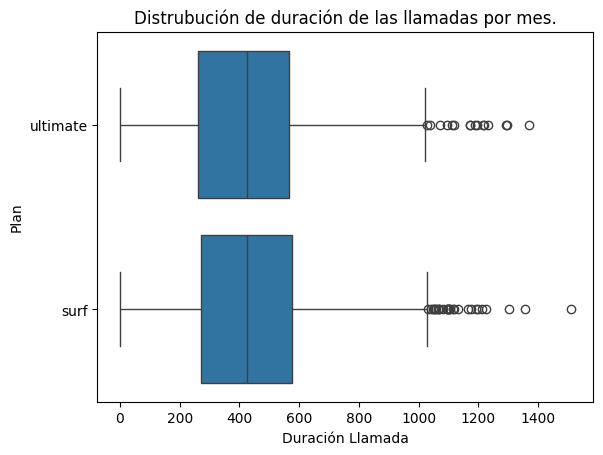

<Figure size 640x480 with 0 Axes>

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#dur_mean = data_w_plan_i[['duration_cieled', 'plan']].reset_index()

sns.boxplot(
    x='duration_cieled',
    y='plan',
    data=data_w_plan_i
)
plt.title('Distrubución de duración de las llamadas por mes.')
plt.xlabel('Duración Llamada')
plt.ylabel('Plan')
plt.show()
plt.clf()

**Creo que no, el comportamiento con respecto a la duracion de las llamadas no es muy diferente con relación al pplan contratado por el usuario.**

### Mensajes

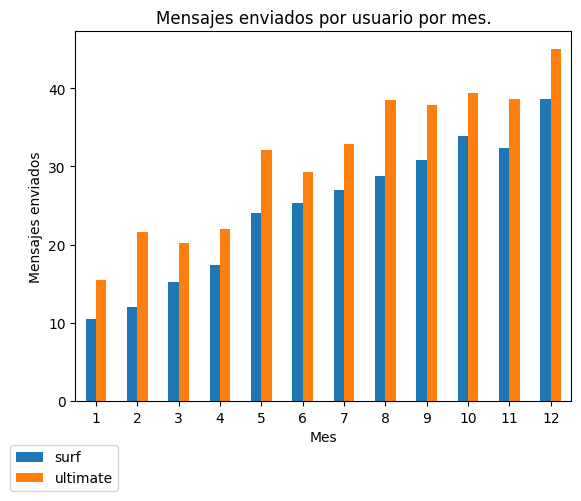

<Figure size 640x480 with 0 Axes>

In [40]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

plan_month_sms = data_w_plan_i.pivot_table(
    index='month',
    columns='plan',
    values='id_tot_sms',
    aggfunc='mean'
)
plan_month_sms.reset_index(inplace=True)

month_ordered = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
plan_month_sms['month_ordered'] = plan_month_sms['month'].map(month_ordered)
plan_month_sms_sort = plan_month_sms.sort_values('month_ordered')

plan_month_sms_sort.plot(
    kind= 'bar',
    title='Mensajes enviados por usuario por mes.',
    x='month_ordered',
    y=['surf', 'ultimate'],
    xlabel='Mes',
    ylabel='Mensajes enviados'
)

plt.legend(['surf', 'ultimate'])
plt.legend(loc='upper right', bbox_to_anchor=(0.1, -0.1))
plt.xticks(rotation = 0)
plt.show()
plt.clf()

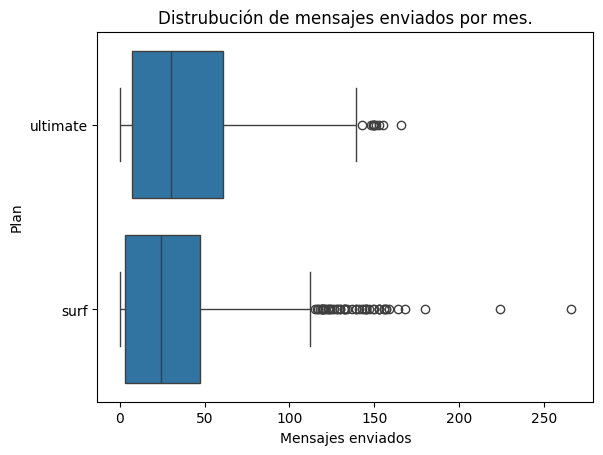

<Figure size 640x480 with 0 Axes>

In [41]:
#Comparacion de envío de mensajes por usuario al mes.

sns.boxplot(
    x='id_tot_sms',
    y='plan',
    data=data_w_plan_i
)
plt.title('Distrubución de mensajes enviados por mes.')
plt.xlabel('Mensajes enviados')
plt.ylabel('Plan')
plt.show()
plt.clf()



**De acuerdo al diagráma anterior, se puede concluir que sí, el numero promedio de mansajes enviados por los usuarios del plan tarifario Ultimate tienden a enviar mas mensajes en comparación con el plan Surf.**

### Internet

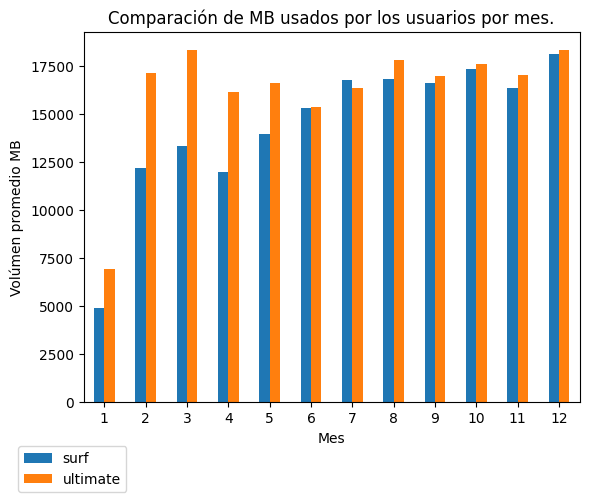

<Figure size 640x480 with 0 Axes>

In [42]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

plan_month_internet = data_w_plan_i.pivot_table(
    index='month',
    columns='plan',
    values='mb_used_cieled',
    aggfunc='mean'
)

plan_month_internet.reset_index(inplace=True)

plan_month_internet['month_ordered'] = plan_month_internet['month'].map(month_ordered)
plan_month_internet = plan_month_internet.sort_values('month_ordered')

plan_month_internet.plot(
    kind='bar',
    title='Comparación de MB usados por los usuarios por mes.',
    x='month_ordered',
    y=['surf', 'ultimate'],
    xlabel='Mes',
    ylabel='Volúmen promedio MB'
)


plt.legend(['surf', 'ultimate'])
plt.legend(loc='upper right', bbox_to_anchor=(0.1, -0.1))
plt.xticks(rotation=0)
plt.show()
plt.clf()



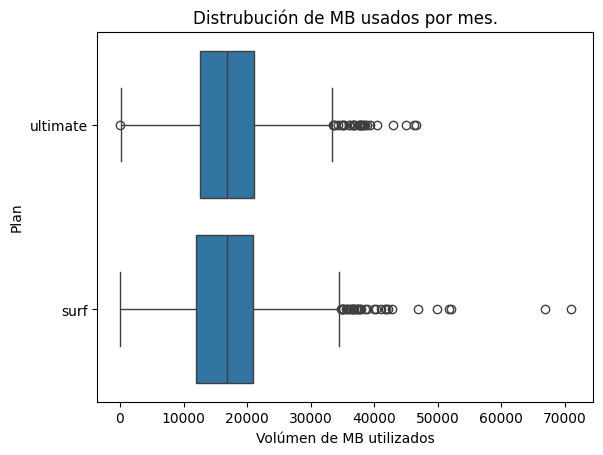

<Figure size 640x480 with 0 Axes>

In [43]:
#Comparacion de volúmen de MB utilizados por usuario al mes.

sns.boxplot(
    x='mb_used_cieled',
    y='plan',
    data=data_w_plan_i
)
plt.title('Distrubución de MB usados por mes.')
plt.xlabel('Volúmen de MB utilizados')
plt.ylabel('Plan')
plt.show()
plt.clf()

**Para el caso del uso de MB utilizados por los usuarios colcluyo que el comportamiento no es significativamente distinto con de acuerdo con el plan contratado por el usuario.**

## Ingreso

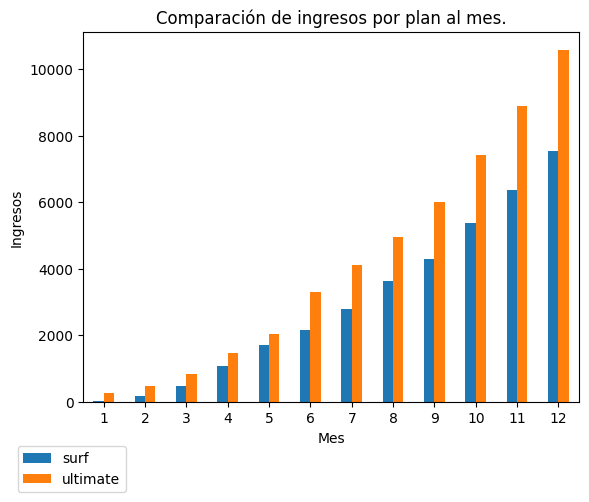

<Figure size 640x480 with 0 Axes>

In [44]:
plan_month_cost = data_w_plan_i.pivot_table(
    index='month',
    columns='plan',
    values='total_plan_cost',
    aggfunc='sum'
)

plan_month_cost.reset_index(inplace=True)

plan_month_cost['month_ordered'] = plan_month_cost['month'].map(month_ordered)
plan_month_cost = plan_month_cost.sort_values('month_ordered')

plan_month_cost.plot(
    kind='bar',
    title='Comparación de ingresos por plan al mes.',
    x='month_ordered',
    y=['surf', 'ultimate'],
    xlabel='Mes',
    ylabel='Ingresos'
)


plt.legend(['surf', 'ultimate'])
plt.legend(loc='upper right', bbox_to_anchor=(0.1, -0.1))
plt.xticks(rotation=0)
plt.show()
plt.clf()

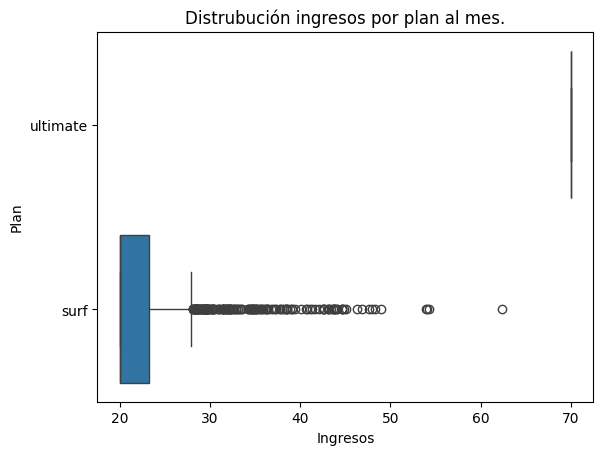

<Figure size 640x480 with 0 Axes>

In [45]:
#Comparacion de ingresos por plan al mes.

sns.boxplot(
    x='total_plan_cost',
    y='plan',
    data=data_w_plan_i
)
plt.title('Distrubución ingresos por plan al mes.')
plt.xlabel('Ingresos')
plt.ylabel('Plan')
plt.show()
plt.clf()



**De acuierdo con la gráfica de caja anterior, se puede observar que el pla Ultimate, no tiene variación en los ingresos, es decir, los usuarios no tienen cargos extras por haber excedido los límites para minutos, mensajes e internet, por otro lado, en lo que resepcta al pla Surf, concluyo que existe un volúmen considerable de usuarios que utilizan una cantidad superior de minutos, mensajes e internet.**

## Prueba las hipótesis estadísticas

Ho : El promedio de los ingresos para ambos planes (Ultimate y surf) son equivalentes.

Ha : El promedio de los ingresos para ambos planes (Ultimate y surf) son distintos.

Nivel significancia $\alpha = 0.05$

In [46]:
# Prueba las hipótesis

#Ho : La Varianza del promedio de los ingresos de los distintos planes (Ultimate y surf) son iguales.
#Ha : La Varianza del promedio de los ingresos de los distintos planes (Ultimate y surf) son diferentes.

ing_ultimate = data_w_plan_i[data_w_plan_i['plan'] == 'ultimate']['total_plan_cost']
ing_surf = data_w_plan_i[data_w_plan_i['plan'] == 'surf']['total_plan_cost']

_, pvalue_lev = levene(ing_ultimate, ing_surf)
_, pvalue = ttest_ind(ing_ultimate, ing_surf, equal_var=True)

print(f'Valor estadístico t: {pvalue}')
print(f'Valor p: {pvalue_lev}')



Valor estadístico t: 0.0
Valor p: 1.6328162641599658e-41


c:\Users\packe\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


**Debido a que el valor p es menor al nivel de significancia establecido se puede rechazar la hipótesis nula para esta parte del proyecto. Por lo anterior, es concluyente que los ingresos para el plan Ultimate son significativamente superiores con relación al plan Surf.**

Ho : El promedio de los ingresos para ambos planes (Ultimate y surf) son iguales para la región de NY-NJ en comparación con otras regiones.

Ha : El promedio de los ingresos para ambos planes (Ultimate y surf) son diferentes para la región de NY-NJ en comparación con otras regiones.

Nivel significancia $\alpha = 0.05$

In [47]:
df_users_ii = df_users[['user_id', 'plan', 'state']]
users_state_plan = pd.merge(data_w_plan_i, df_users_ii, on='user_id')

users_state_plan.sample(5)


,user_id,month,id_tot_calls,duration_cieled,id_tot_sms,mb_used,mb_used_cieled,plan_x,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,usd_per_mb,extra_mins_pay,extra_sms_pay,extra_internet_pay,total_plan_cost,plan_y,state
1984,1425,November,23.0,193.0,14.0,23576.40,23577.0,surf,50,15360,...,10,0.03,0.03,0.009766,0.0,0.0,0.000000,20.000000,surf,NV
2029,1436,October,53.0,470.0,0.0,16018.68,16019.0,ultimate,1000,30720,...,7,0.01,0.01,0.006836,0.0,0.0,0.000000,70.000000,ultimate,PA-NJ-DE-MD
2057,1443,November,21.0,187.0,5.0,12661.38,12662.0,surf,50,15360,...,10,0.03,0.03,0.009766,0.0,0.0,0.000000,20.000000,surf,GA
2161,1469,December,28.0,239.0,24.0,30828.83,30829.0,surf,50,15360,...,10,0.03,0.03,0.009766,0.0,0.0,0.000000,20.000000,surf,NY-NJ-PA
2002,1431,December,80.0,670.0,39.0,23992.00,23992.0,surf,50,15360,...,10,0.03,0.03,0.009766,5.1,0.0,1.660156,26.760156,surf,CA


In [48]:
# Prueba las hipótesis

#Ho : La Varianza del promedio de los ingresos para los distintos planes (Ultimate y surf) son iguales para la región de NY-NJ en comparación con otras regiones.
#Ha : La Varianza del promedio de los ingresos para los distintos planes (Ultimate y surf) son diferentes para la región de NY-NJ en comparación con otras regiones.

ing_ny_nj = users_state_plan[users_state_plan['state'] == "NY-NJ-PA"]['total_plan_cost']
ing_oth_stat = users_state_plan[users_state_plan['state'] != "NY-NJ-PA"]['total_plan_cost']


_, pvalue_lev_ny = levene(ing_ny_nj, ing_oth_stat)

_, pvalue_oth_state = ttest_ind(ing_ny_nj, ing_oth_stat, equal_var=True)



print(f'Valor estadístico t para NY-NJ: {pvalue_lev_ny}')
print(f'Valor p para otros estados: {pvalue_oth_state}')





Valor estadístico t para NY-NJ: nan
Valor p para otros estados: nan


C:\Users\packe\AppData\Local\Temp\ipykernel_17292\2759644433.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, pvalue_lev_ny = levene(ing_ny_nj, ing_oth_stat)
C:\Users\packe\AppData\Local\Temp\ipykernel_17292\2759644433.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, pvalue_oth_state = ttest_ind(ing_ny_nj, ing_oth_stat, equal_var=True)


## Conclusión general

**Conclusión General:**

**Como primer punto de la conlusión quiero hacer notar que el niel de ingresos oara ambos planes incrementó a lo largo del año, como se observa en la siguiente gráfica:**

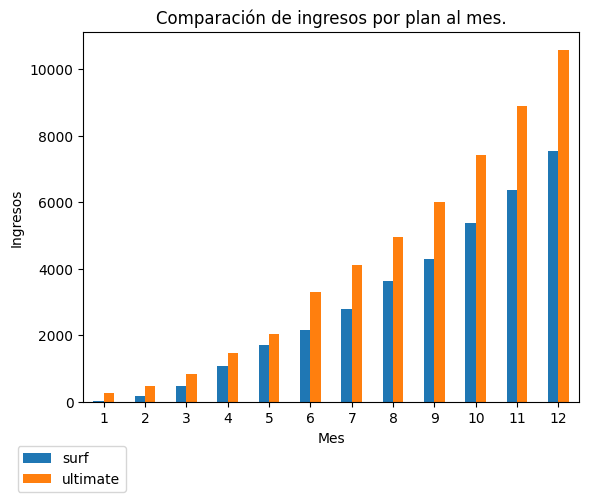

**Por otro lado, es observable que los usuarios del plan tarifario "Surf" se observa que con frecuencia rebasan el límite para los minutos, mensajes y MB, por lo anterior es recomendable profundizar en la posibilidad de la creación de planes intermedios los cuales incluyan los servicios considerando un rango medio, esto con el objetivo de fomentar la lealtad de los clientes al reducir las inconformidades por los cargos extras al final del mes para el usuario, además de contar con una mayor variedad de oferta de productos.**

**En general, es un buen proyecto y me permitió poner en práctica todo o casi todo lo que he aprendido a través del bootcamp.**